In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

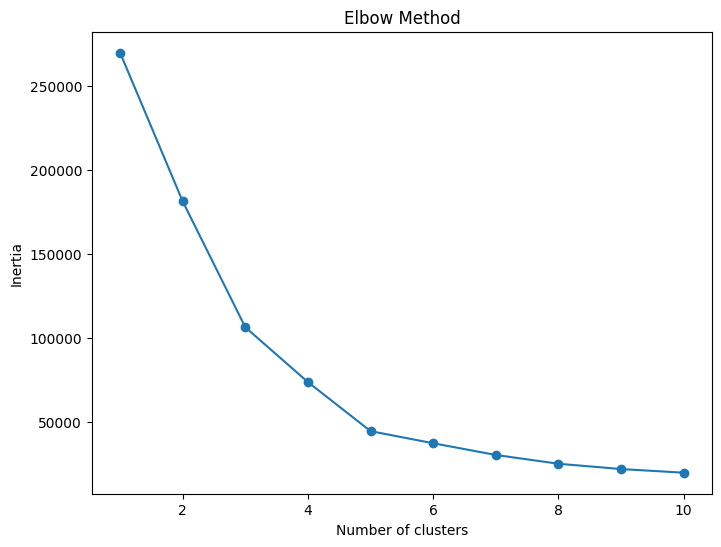

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the sum of squared distances for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [8]:
# Choose the optimal number of clusters (e.g., 5 based on the elbow method)
n_clusters = 5

# Create the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
data['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=f38b1456da0af841895ad6406fdd683f51b382f2b2f4b2cd191c9f2a2f9e89e0
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [12]:
from minisom import MiniSom
import numpy as np

# Normalize the feature values
X_normalized = (X - X.mean()) / X.std()

# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5, random_seed=42)

# Train the SOM
som.random_weights_init(X_normalized.values)
som.train_random(X_normalized.values, 100)

# Get the SOM clusters
som_clusters = np.array([som.winner(x) for x in X_normalized.values])

# Add SOM cluster labels to the original dataset
data['SOM_Cluster'] = som_clusters[:, 0] * 10 + som_clusters[:, 1]

# Display the updated dataset with cluster labels
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  SOM_Cluster  
0        2           49  
1        3           59  
2        2           35  
3        3           59  
4        2           49  


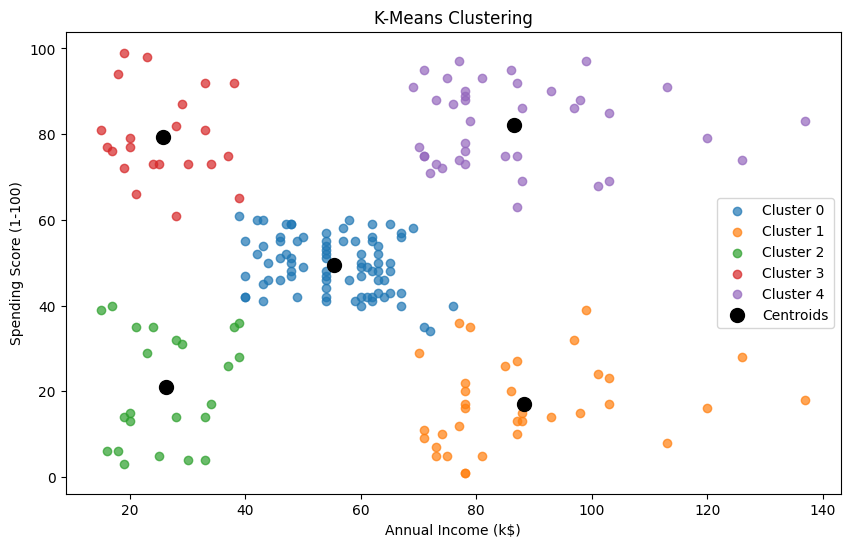

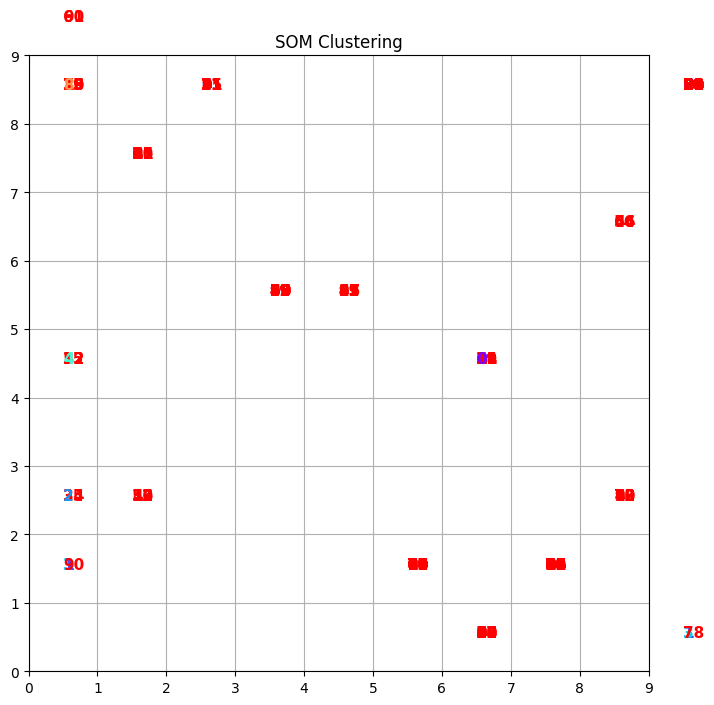

In [13]:
# Visualization for K-Means clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(X[clusters == cluster]['Annual Income (k$)'],
                X[clusters == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}',
                alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Visualization for SOM clusters
plt.figure(figsize=(8, 8))
for i, (x, _) in enumerate(X_normalized.values):
    w = som.winner(x)
    plt.text(w[0] + .5,  w[1] + .5,  str(data['SOM_Cluster'][i]), color=plt.cm.rainbow(data['SOM_Cluster'][i] / 10), fontdict={'weight': 'bold',  'size': 11})
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.grid()
plt.title('SOM Clustering')
plt.show()
